In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter, defaultdict
from functools import partial
import math, random
style.use('ggplot')
%matplotlib inline

In [3]:
#  유방암 환자 데이터
from sklearn import datasets
cancer = datasets.load_breast_cancer()

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

/Users/sechang/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 1. 다수결 (Voting Classifier)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier

model1 = LogisticRegression(random_state=1)
model2 = QuadraticDiscriminantAnalysis()
model3 = GaussianNB()

vc = VotingClassifier(estimators=[('lr', model1), ('qda', model2), ('gnb', model3)], 
                            voting='soft', weights=[1, 1, 2])

### (1) 각 classifier 결과

In [5]:
model1 = LogisticRegression(random_state=1)
model2 = QuadraticDiscriminantAnalysis()
model3 = GaussianNB()

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

print("LogisticRegression test set 정확도: {:.3f}".format(model1.score(X_test, y_test)))
print("QuadraticDiscriminantAnalysis  test set 정확도: {:.3f}".format(model2.score(X_test, y_test)))
print("GaussianNB test set 정확도: {:.3f}".format(model3.score(X_test, y_test)))

LogisticRegression test set 정확도: 0.958
QuadraticDiscriminantAnalysis  test set 정확도: 0.958
GaussianNB test set 정확도: 0.937


### (2) Voting 결과

In [6]:
vc.fit(X_train, y_train)

print("training set 정확도: {:.3f}".format(vc.score(X_train, y_train)))
print("test set 정확도: {:.3f}".format(vc.score(X_test, y_test)))

training set 정확도: 0.958
test set 정확도: 0.937


/Users/sechang/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/sechang/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


------

# 2. 배깅 (Bagging)

## (1) 의사결정 나무

In [7]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

print("training set 정확도: {:.3f}".format(dt.score(X_train, y_train)))
print("test set 정확도: {:.3f}".format(dt.score(X_test, y_test)))

training set 정확도: 1.000
test set 정확도: 0.895


## (2) Bagging

In [8]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(base_estimator=dt)
bg.fit(X_train, y_train)

print("training set 정확도: {:.3f}".format(bg.score(X_train, y_train)))
print("test set 정확도: {:.3f}".format(bg.score(X_test, y_test)))

training set 정확도: 0.998
test set 정확도: 0.944


------

# 3. 랜덤포레스트 (Random Forest)

## (1) Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print("training set 정확도: {:.3f}".format(rf.score(X_train, y_train)))
print("test set 정확도: {:.3f}".format(rf.score(X_test, y_test)))

training set 정확도: 1.000
test set 정확도: 0.944


## (2) feature importance

In [11]:
rf.feature_importances_

array([0.06098585, 0.01149787, 0.01522797, 0.07055178, 0.00695258,
       0.00254882, 0.01500734, 0.24560673, 0.00730976, 0.00049924,
       0.00741369, 0.00351075, 0.00663739, 0.05991946, 0.00989838,
       0.0034071 , 0.02315627, 0.01454387, 0.00114757, 0.0040158 ,
       0.00268921, 0.01474255, 0.03744903, 0.2303688 , 0.01658632,
       0.01568926, 0.01297454, 0.05609115, 0.03119749, 0.01237344])

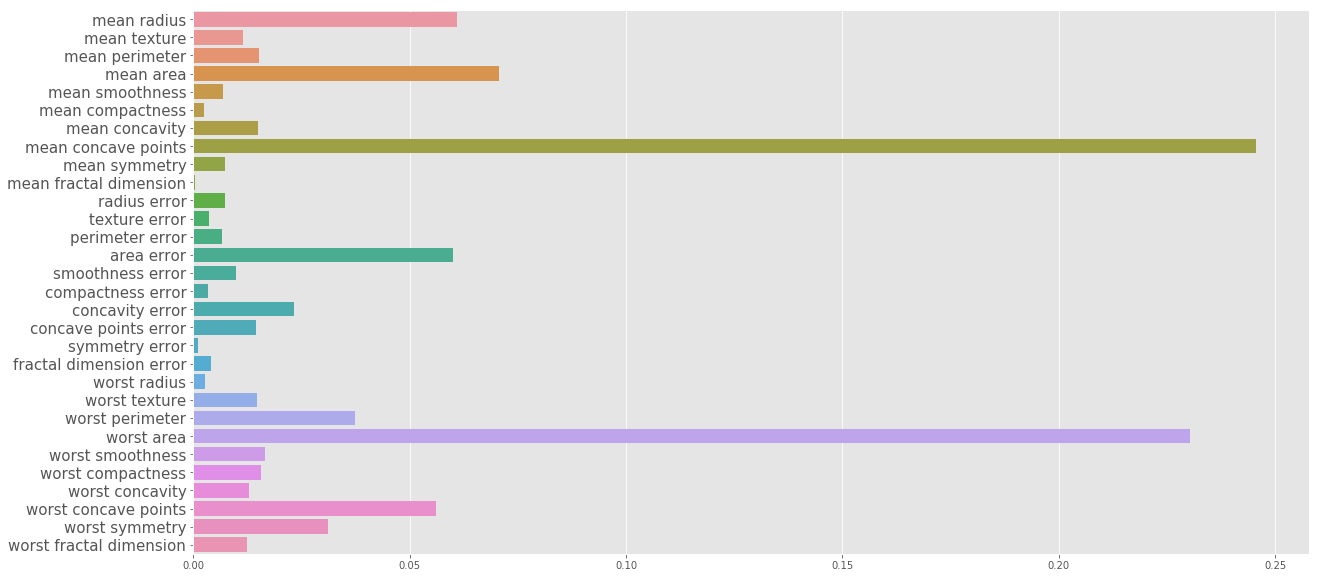

In [15]:
plt.figure(figsize =(20, 10))
sns.barplot(rf.feature_importances_, cancer.feature_names)
plt.yticks(fontsize = 15);

------

# 4. Boosting

## (1)-1 AdaBoost
- 가장 기본적인 부스팅 알고리즘
- 약분류기를 가중 선형 결합한다.

In [16]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)

print("training set 정확도: {:.3f}".format(ab.score(X_train, y_train)))
print("test set 정확도: {:.3f}".format(ab.score(X_test, y_test)))

training set 정확도: 1.000
test set 정확도: 0.979


## (1)-2 feature importance

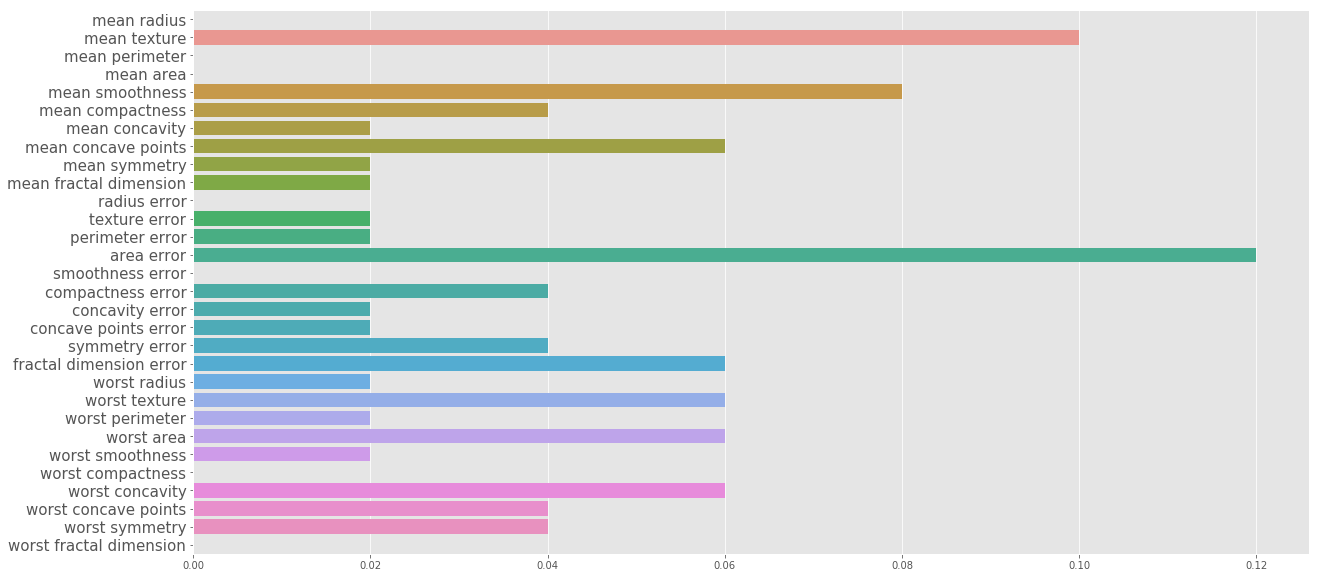

In [17]:
plt.figure(figsize =(20, 10))
sns.barplot(ab.feature_importances_, cancer.feature_names)
plt.yticks(fontsize = 15);

## (2)-1 Gradient Boost
- 오차함수를 최소화시키는데 gradient descent 방식을 사용한다.

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

print("training set 정확도: {:.3f}".format(gb.score(X_train, y_train)))
print("test set 정확도: {:.3f}".format(gb.score(X_test, y_test)))

training set 정확도: 1.000
test set 정확도: 0.958


## (2)-2 feature importance

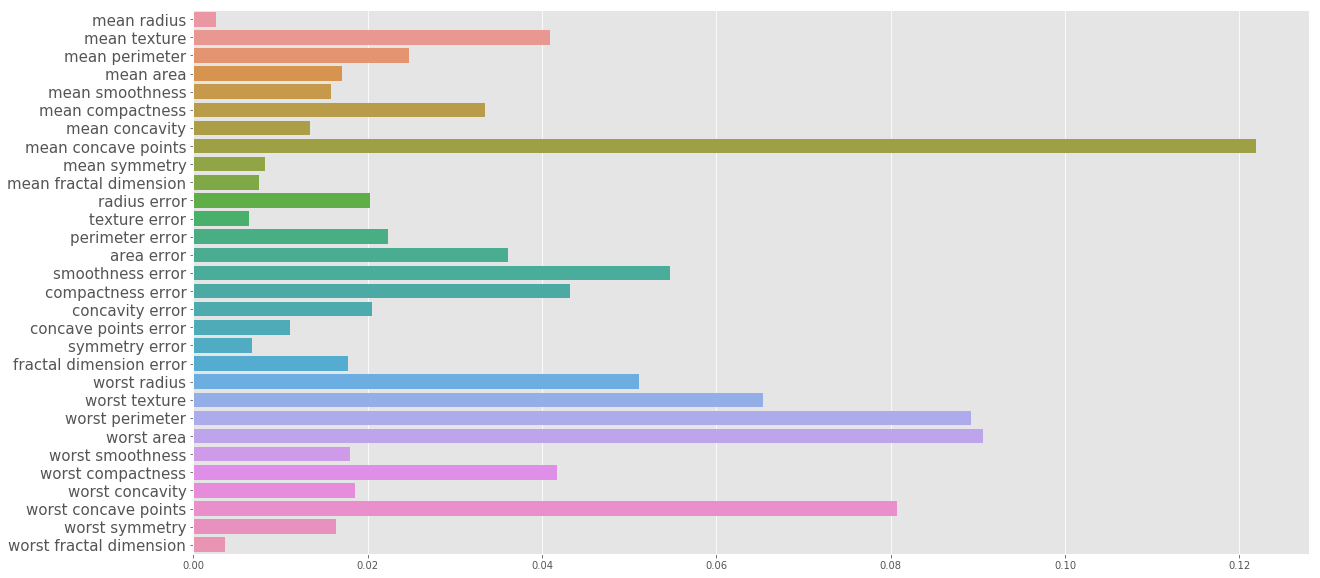

In [19]:
plt.figure(figsize =(20, 10))
sns.barplot(gb.feature_importances_, cancer.feature_names)
plt.yticks(fontsize = 15);

# 5. xgboost
- 현재 Kaggle 같은 많은 머신러닝 대회에서 압도적으로 많은 비율로 사용되는 모델.
- 기존 Gradient Boosting 모델에 정규화 방식을 차용하여 과적합을 방지하고, 병렬 처리를 가능하게해 정확도, 속도 모두 향상 시켰다.
- https://homes.cs.washington.edu/~tqchen/pdf/BoostedTree.pdf

## (1) xgboost

In [ ]:
# !pip install xgboost

In [20]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

print("training set 정확도: {:.3f}".format(xgb.score(X_train, y_train)))
print("test set 정확도: {:.3f}".format(xgb.score(X_test, y_test)))

training set 정확도: 1.000
test set 정확도: 0.979


/Users/sechang/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/sechang/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## (2) feature importance

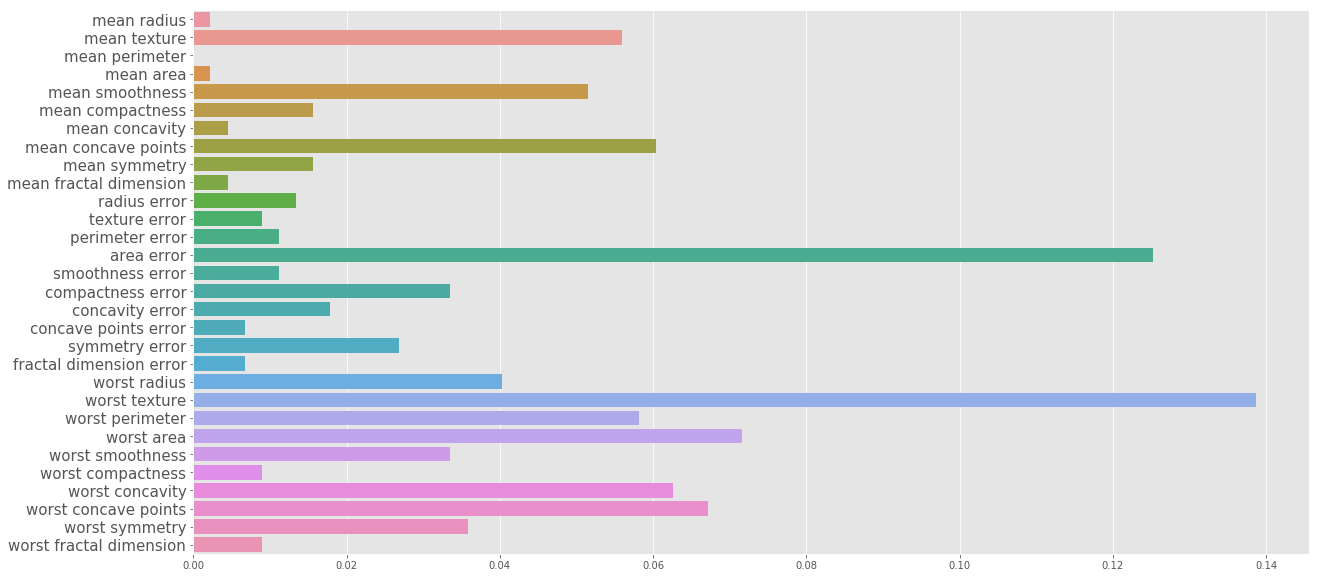

In [21]:
plt.figure(figsize =(20, 10))
sns.barplot(xgb.feature_importances_, cancer.feature_names)
plt.yticks(fontsize = 15);

> ### 빠르게 실행이 가능하고, 성능이 우수하므로 본격적인 머신러닝 모델링을 하기 전에 가장 먼저 실행해서 결과를 살펴보는 것이 좋다.